In [1]:
#importt pandas,numpy,matplot,seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import uber data into jupyter
uber = pd.read_csv(r"C:\Users\HARUN\Downloads\Uber Request Data.csv")
print(uber)

      Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Compl

In [3]:
#show the number of columns
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
#change the date format to YYYY-MM-DD to the "request timestamp"
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],dayfirst=True)

In [5]:
#after modification 
uber['Request timestamp']

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
5      2016-07-13 21:57:28
6      2016-07-14 06:15:32
7      2016-07-15 05:11:52
8      2016-07-15 17:57:27
9      2016-07-11 06:46:00
10     2016-07-12 05:08:00
11     2016-07-12 12:30:00
12     2016-07-13 04:49:20
13     2016-07-13 08:02:53
14     2016-07-13 14:23:02
15     2016-07-13 17:23:18
16     2016-07-14 12:01:02
17     2016-07-14 22:24:13
18     2016-07-11 10:00:00
19     2016-07-11 18:45:00
20     2016-07-12 11:17:00
21     2016-07-12 15:46:00
22     2016-07-12 18:00:00
23     2016-07-13 08:17:29
24     2016-07-13 21:54:18
25     2016-07-14 21:23:03
26     2016-07-15 02:41:38
27     2016-07-15 10:00:43
28     2016-07-11 13:08:00
29     2016-07-12 06:21:00
               ...        
6715   2016-07-15 22:34:01
6716   2016-07-15 22:36:13
6717   2016-07-15 22:37:37
6718   2016-07-15 22:43:46
6719   2016-07-15 22:49:33
6720   2016-07-15 22:49:45
6

In [6]:
#we have to change the date format to "drop timestamp"
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

In [7]:
#changes after modification
uber['Drop timestamp']

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
5      2016-07-13 22:28:59
6      2016-07-14 07:13:15
7      2016-07-15 06:07:52
8      2016-07-15 18:50:51
9      2016-07-11 07:25:00
10     2016-07-12 06:02:00
11     2016-07-12 12:57:00
12     2016-07-13 05:23:03
13     2016-07-13 09:16:19
14     2016-07-13 15:35:18
15     2016-07-13 18:20:51
16     2016-07-14 12:36:46
17     2016-07-14 23:18:52
18     2016-07-11 10:31:00
19     2016-07-11 19:23:00
20     2016-07-12 12:23:00
21     2016-07-12 16:40:00
22     2016-07-12 18:28:00
23     2016-07-13 09:22:37
24     2016-07-13 22:51:23
25     2016-07-14 22:25:19
26     2016-07-15 03:24:43
27     2016-07-15 10:53:06
28     2016-07-11 13:49:00
29     2016-07-12 07:10:00
               ...        
6715                   NaT
6716                   NaT
6717                   NaT
6718                   NaT
6719                   NaT
6720                   NaT
6

In [8]:
#we have to split the timings into different categories to "Request timestamp"
hours = uber['Request timestamp'].dt.hour.values
uber['Request_timeOfDay'] = np.where((hours >= 1) & (hours<=6),'Early_Morning', 
                      np.where((hours >6) & (hours<=9),'Morning',
                        np.where((hours>9) & (hours<=12),'Rush_Time',
                          np.where((hours>12) & (hours<=15),'noon_time',
                            np.where((hours>15) & (hours<=17),'Evening',
                              np.where((hours>17) & (hours<=21),'Late_evening','Night'))))))

In [9]:
#to remove the warning 
np.warnings.filterwarnings('ignore')

In [10]:
#we have to do same thing as done in "request timestamp"
hours = uber['Drop timestamp'].dt.hour.values
uber['Drop_timeOfDay'] = np.where((hours >= 1) & (hours<=6),'Early_Morning', 
                      np.where((hours >6) & (hours<=9),'Morning',
                        np.where((hours>9) & (hours<=12),'Rush_Time',
                          np.where((hours>12) & (hours<=15),'noon_time',
                            np.where((hours>15) & (hours<=17),'Evening',
                              np.where((hours>17) & (hours<=21),'Late_evening','Night'))))))

In [11]:
#after modification we get the uber data
print(uber)

      Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Compl

In [12]:
#after modification we get the number of columns
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_timeOfDay,Drop_timeOfDay
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Rush_Time,noon_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Evening,Late_evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Late_evening,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Morning


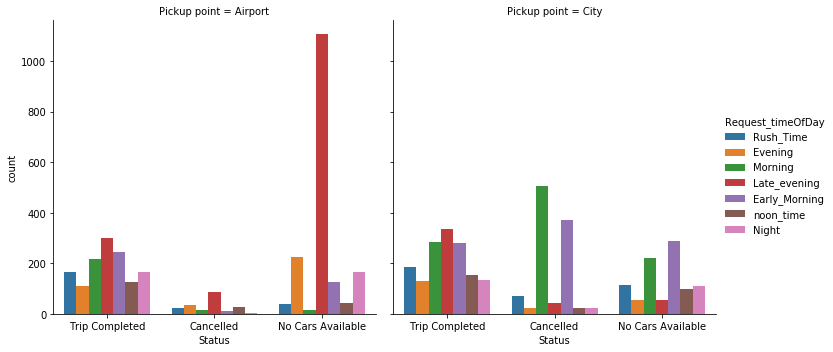

In [13]:
#plot the catplot for "status","Pickup point",and "request timestamp" for the analysing
sns.catplot(x='Status',col='Pickup point',hue='Request_timeOfDay',data=uber,kind='count')

In [14]:
#do the groupby code for "Request timestamp", and "Pick point" to know the request and pick points area
uber_demand = uber.groupby(['Request_timeOfDay','Pickup point']).size()
print(uber_demand)

Request_timeOfDay  Pickup point
Early_Morning      Airport          381
                   City             941
Evening            Airport          369
                   City             208
Late_evening       Airport         1492
                   City             432
Morning            Airport          245
                   City            1015
Night              Airport          334
                   City             263
Rush_Time          Airport          226
                   City             372
noon_time          Airport          191
                   City             276
dtype: int64


In [24]:
#get the data of only trip completed data
supply=uber.loc[uber["Status"]== 'Trip Completed']
supply

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_timeOfDay,Drop_timeOfDay
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Rush_Time,noon_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Evening,Late_evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Late_evening,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Late_evening,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Early_Morning,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Early_Morning,Early_Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Evening,Late_evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Early_Morning,Morning


In [25]:
#find the supply data of uber
uber_supply = supply.groupby(['Request_timeOfDay','Pickup point']).size()
print(uber_supply)

Request_timeOfDay  Pickup point
Early_Morning      Airport         246
                   City            280
Evening            Airport         112
                   City            130
Late_evening       Airport         299
                   City            334
Morning            Airport         216
                   City            286
Night              Airport         165
                   City            132
Rush_Time          Airport         165
                   City            187
noon_time          Airport         124
                   City            155
dtype: int64


In [19]:
#fine the gap between the demand and supply
uber_gap = uber_demand-uber_supply
uber_gap

Request_timeOfDay  Pickup point
Early_Morning      Airport          135
                   City             661
Evening            Airport          257
                   City              78
Late_evening       Airport         1193
                   City              98
Morning            Airport           29
                   City             729
Night              Airport          169
                   City             131
Rush_Time          Airport           61
                   City             185
noon_time          Airport           67
                   City             121
dtype: int64

In [26]:
#merge the demand and supply and gap 
df = [uber_demand, uber_supply, uber_gap]
Result = pd.concat(df)
Result

Request_timeOfDay  Pickup point
Early_Morning      Airport          381
                   City             941
Evening            Airport          369
                   City             208
Late_evening       Airport         1492
                   City             432
Morning            Airport          245
                   City            1015
Night              Airport          334
                   City             263
Rush_Time          Airport          226
                   City             372
noon_time          Airport          191
                   City             276
Early_Morning      Airport          246
                   City             280
Evening            Airport          112
                   City             130
Late_evening       Airport          299
                   City             334
Morning            Airport          216
                   City             286
Night              Airport          165
                   City             132
Rush_Tim

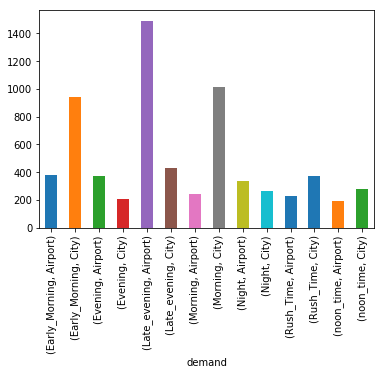

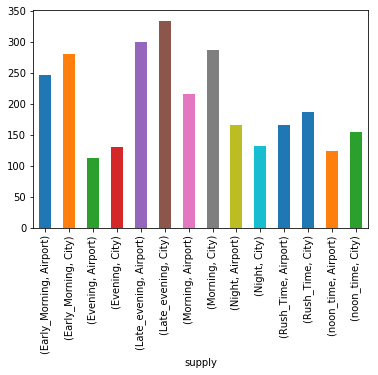

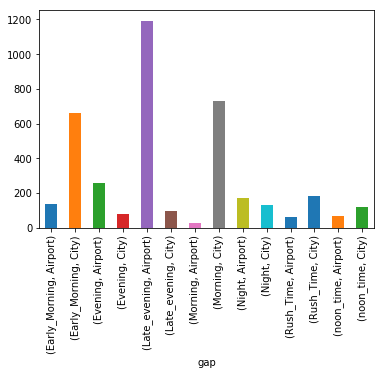

In [27]:
#plot of demand
uber_demand.plot.bar()
plt.xlabel("demand")
plt.show()
#plot of supply
uber_supply.plot.bar()
plt.xlabel("supply")
plt.show()
#plot of gap
uber_gap.plot.bar()
plt.xlabel("gap")
plt.show()

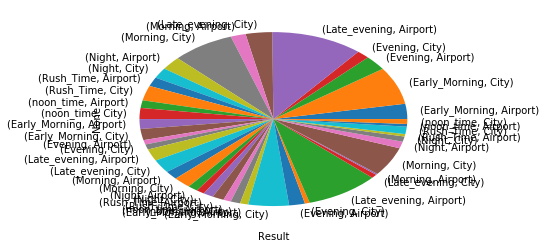

In [28]:
#plot of Result
Result.plot.pie()
plt.xlabel("Result")
plt.show()